# 2.2 Кластеризация. Баннеры.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

## Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 элементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет используя pandas `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift

In [500]:
df = pd.read_csv("../../data/checkins.csv.gz",compression='gzip')

In [501]:
df.shape

(100000, 2)

In [502]:
df.head()

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [503]:
df.describe()

,latitude,longitude
count,100000.000000,100000.000000
mean,36.886388,-89.396849
std,8.351517,35.579317
min,-45.031162,-159.670833
25%,33.494170,-112.074037
50%,38.646991,-87.743938
75%,40.740389,-75.163789
max,67.631479,174.908056


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

Инфо [Потоки в Python](https://webdevblog.ru/vvedenie-v-potoki-v-python/)

In [297]:
ms = MeanShift(bandwidth=0.1)

In [298]:
%%time
ms.fit(df)

Wall time: 2min 40s


MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [299]:
cluster_centers = ms.cluster_centers_
labels = ms.labels_

In [305]:
print('clusters: {}'.format(len(cluster_centers)))

clusters: 3231


### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
offices = np.array([[33.751277, -118.188740],
           [25.867736, -80.324116], 
           [51.503016, -0.075479],
           [52.378894, 4.885084],
           [39.366487, 117.036146],
           [-33.868457, 151.20513]])

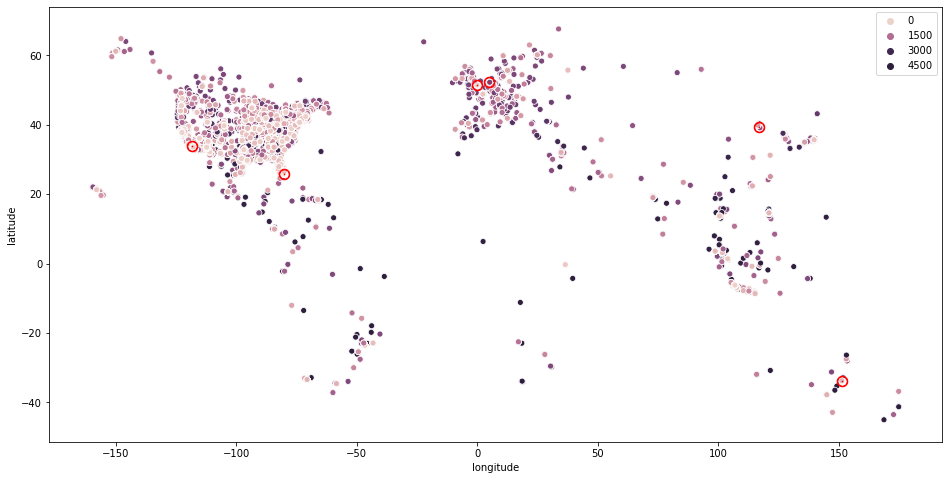

In [466]:
plt.figure(figsize=(16,8)) 
plt.scatter(x=offices[:,1],y=offices[:,0], marker = ".",color = 'r', s = 10, linewidths = 10, zorder = 10)
sns.scatterplot(data = df, x='longitude', y='latitude', hue=labels)

#Добавить центры кластеров
#plt.scatter(cluster_centers[:,1],cluster_centers[:,0],marker = ".",color = 'g', s = 10, linewidths = 2, zorder = 10)
plt.show()

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [ ]:
#! Разобраться с itertools.groupby

In [504]:
df['cluster'] = labels

In [505]:
df_15 = df.groupby('cluster').filter(lambda x: len(x)>15)

In [506]:
df_15.groupby('cluster')['cluster'].unique().count()

592

In [507]:
df_15.shape

(90862, 3)

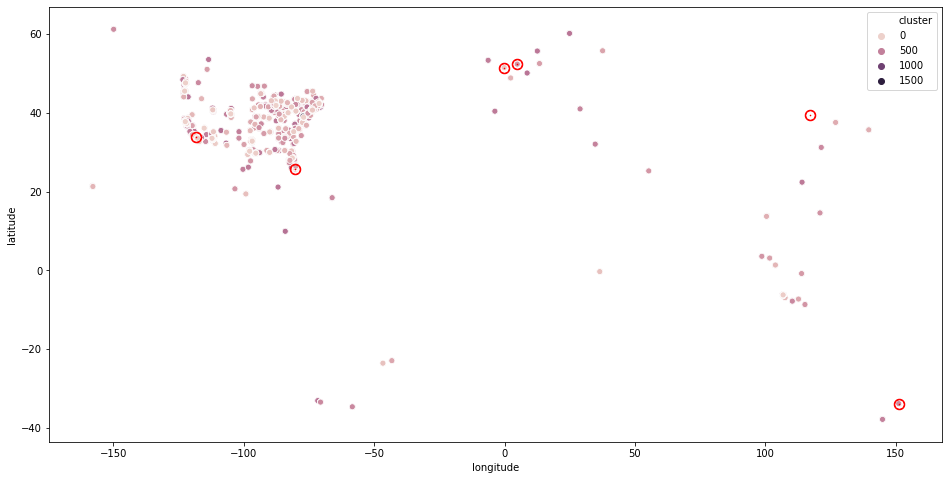

In [508]:
plt.figure(figsize=(16,8)) 
#Добавить офисы
plt.scatter(x=offices[:,1],y=offices[:,0], marker = ".",color = 'r', s = 10, linewidths = 10, zorder = 10)
#Добавить точки
sns.scatterplot(data = df_15, y='latitude',x='longitude', hue='cluster')

#Добавить центры кластеров
#for l in df_15['labels'].unique():
#    plt.scatter(cluster_centers[l-1:l,1],cluster_centers[l-1:l,0],marker = ".",color = 'g', s = 10, linewidths = 1, zorder = 10)
plt.show()

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [510]:
#Считаю евклидово расстояние и записываю в df_15
offices_name = ['Los Angeles','Miami','London','Amsterdam','Beijing','Sydney']
for i in range(6):
    df_15['to_{}'.format(offices_name[i])] = ((offices[i][0] - df_15['latitude'][i])**2 +\
                                              (offices[i][1] - df_15['longitude'][i])**2\
                                             )**0.5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [511]:
df_15

,latitude,longitude,cluster,to_Los Angeles,to_Miami,to_London,to_Amsterdam,to_Beijing,to_Sydney
0,38.895112,-77.036366,5,41.472605,8.923639,122.746461,117.365741,229.186605,270.334783
1,33.800745,-84.410520,7,41.472605,8.923639,122.746461,117.365741,229.186605,270.334783
2,45.523452,-122.676207,30,41.472605,8.923639,122.746461,117.365741,229.186605,270.334783
3,40.764462,-111.904565,65,41.472605,8.923639,122.746461,117.365741,229.186605,270.334783
4,33.448377,-112.074037,1,41.472605,8.923639,122.746461,117.365741,229.186605,270.334783
...,...,...,...,...,...,...,...,...,...
99995,33.575000,-117.725556,50,41.472605,8.923639,122.746461,117.365741,229.186605,270.334783
99996,37.629349,-122.400087,4,41.472605,8.923639,122.746461,117.365741,229.186605,270.334783
99997,29.762884,-95.383061,25,41.472605,8.923639,122.746461,117.365741,229.186605,270.334783
99998,32.802955,-96.769923,19,41.472605,8.923639,122.746461,117.365741,229.186605,270.334783


Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)` если считаете через geopy, либо `(-33.86063043, 151.20477593)` если считаете с евклидовой метрикой. Если у вас не так, то считайте, что вы сделали что-то неправильно. 